In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
sunspot_data = pd.read_csv('/home/souvik/Repos/Datasets/monthly-sunspots.csv', index_col=0, parse_dates=True)

In [3]:
sunspot_data.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


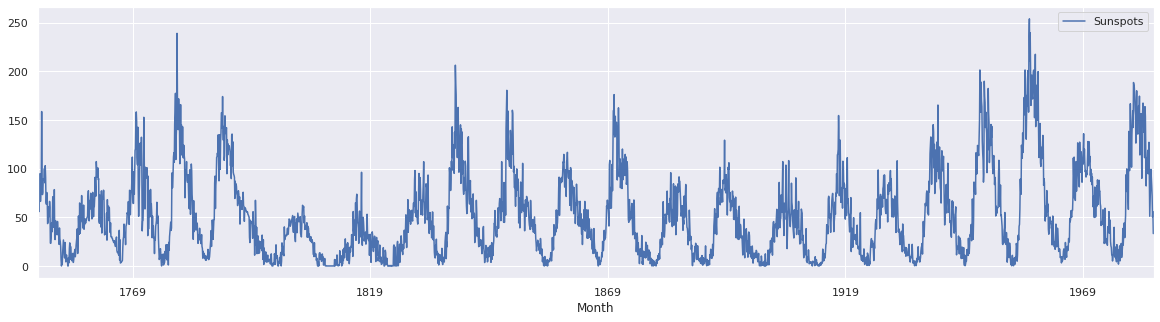

In [4]:
sunspot_data.plot(figsize = (20, 5))

In [5]:
# sunspot_data['Sunspots'].rolling(window=12).mean().plot()
# sunspot_data['Sunspots'].rolling(window=12).std().plot()
sunspot_data['RMA'] = sunspot_data['Sunspots'].rolling(window=12).mean()
sunspot_data['Diff'] = sunspot_data['Sunspots'].diff()
sunspot_data['Seasonal Diff'] = sunspot_data['Sunspots'].diff(12)
sunspot_data['Seasonal 2 Diff'] = sunspot_data['Seasonal Diff'].diff(12)

In [6]:
#decompose = seasonal_decompose(sunspot_data['Sunspots'].dropna())
# diff_decompose = seasonal_decompose(sunspot_data['Diff'].dropna())
seasonal_decompose = seasonal_decompose(sunspot_data['Seasonal Diff'][:1000].dropna())
#result = decompose.seasonal.plot()
#result1 = diff_decompose.seasonal.plot()


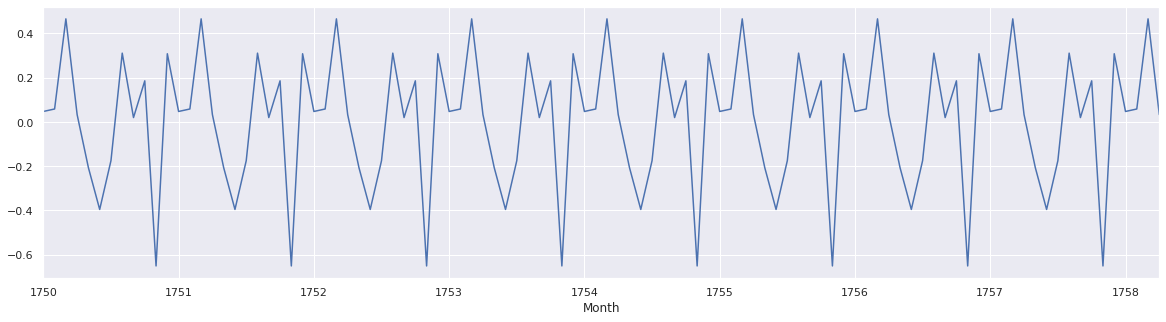

In [7]:
result2 = seasonal_decompose.seasonal[:100].plot(figsize=(20, 5))

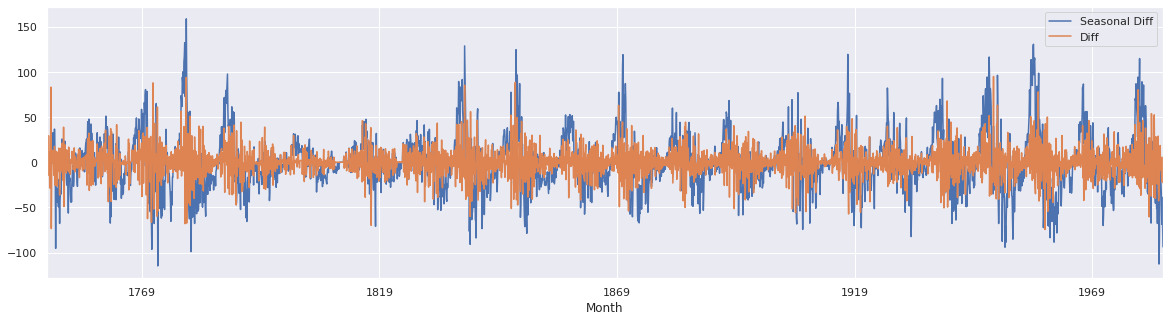

In [8]:
sunspot_data[['Seasonal Diff', 'Diff']].plot(figsize=(20, 5))

In [9]:
def adf(dataset):
    print(adfuller(dataset))
    
adf(sunspot_data['Seasonal Diff'].dropna())
adf(sunspot_data['Diff'].dropna())


(-8.611026054085677, 6.475352948906244e-14, 25, 2782, {'1%': -3.432702747682219, '5%': -2.862579477749862, '10%': -2.56732334640735}, 23880.161217828216)
(-8.647590698681014, 5.2196906813433e-14, 23, 2795, {'1%': -3.43269179459483, '5%': -2.8625746404198122, '10%': -2.567320771022878}, 23217.829745939103)


In [10]:
# First diff p = 2, d = 1, q = 2

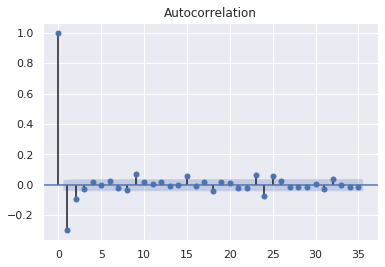

In [11]:
acf_graph = plot_acf(sunspot_data['Diff'].dropna())

In [12]:
len(sunspot_data['RMA'].dropna())

2809

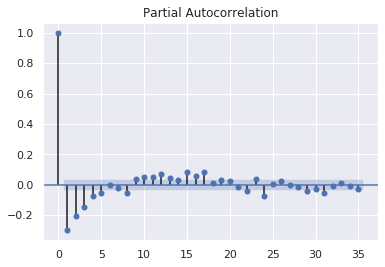

In [13]:
pacf_graph = plot_pacf(sunspot_data['Diff'].dropna())

In [14]:
# Seasonal Diff p = 12, q =  1

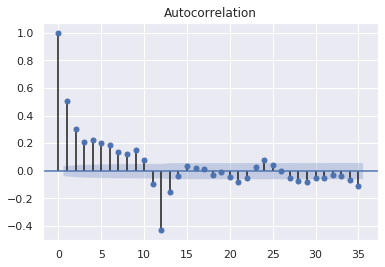

In [15]:
acf_graph = plot_acf(sunspot_data['Seasonal 2 Diff'].dropna())

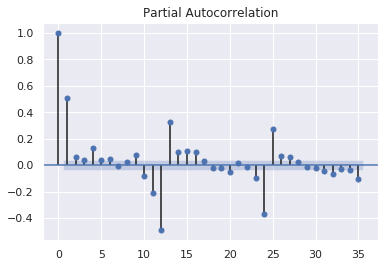

In [16]:
pacf_graph = plot_pacf(sunspot_data['Seasonal 2 Diff'].dropna())

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# resDiff = sm.tsa.arma_order_select_ic(sunspot_data['Diff'].dropna(), max_ar=4, max_ma=4, ic='aic', trend='c')

# print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

# resDiff

In [19]:
model = sm.tsa.statespace.SARIMAX(sunspot_data['Sunspots'][:1700], order=(2,1,4), seasonal_order=(12,2,2,12))

In [ ]:
model_fit=model.fit()

In [ ]:
redid_acf=plot_acf(model_fit.resid)

In [ ]:
future=model_fit.predict(start = 0, end=4000)

In [ ]:
sunspot_data['Future'] = future

In [ ]:
sunspot_data

In [ ]:
sunspot_data[['Sunspots', 'Future']].plot(figsize=(20, 10))

In [ ]:
future.plot(figsize=(20, 10))